In [1]:
!pip install burr[start]
!pip install openai
!pip install tavily-python


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from application import application as researcher_app

## Deep Researcher

This is an example of a research assistant agent that uses llm chat and llm-friendly search together to provide a report, complete with internet citations, on a topic of the user's choosing. The graph for the agent includes optional reflection and re-writing that is implemented as a loop. This particular version of a research assistant uses the OpenAI API code for chat and the Tavily API for search. 

Given a research topic, the research assistant flow consists of several steps. On initialization, the assistant must:

1. Use the chat API to generate a search query for web search based on the research topic.

It then loops through the following three steps as many times as the user desires, controlled by the variable `num_loops`.

2. Perform web research based on the search query using the search API.
3. Use the chat API to summarize the web research gathered in the previous step.
4. Reflect on the summary to generate a follow-up search query.

When the number of loops is exhausted, the assistant must:

5. Finalize summary with formatted sources and return it to the user.

The graph for the application is visualized below.
   


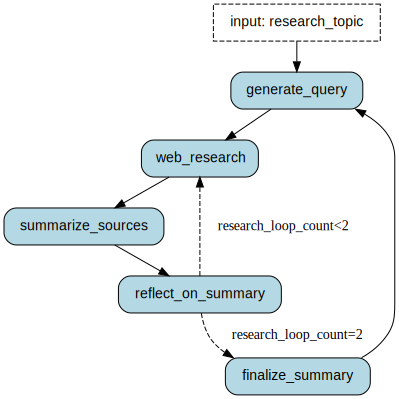

In [4]:
app = researcher_app(app_id="1")
app.visualize(include_conditions=True)

To run the application, we need tokens for the OpenAI api and the Tavily api.

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "sk-*"
os.environ["TAVILY_API_KEY"] = "tvly-*"

In [6]:
my_research_topic = "getting a job in datascience"
action, state, result = app.run(halt_after=["finalize_summary"], inputs={"research_topic": my_research_topic})
print(app.state["running_summary"])     

## Summary

To secure a job in data science, it's crucial to prepare effectively for interviews by thoroughly researching the company and understanding its culture, aligning your skills with its business objectives. Tailoring your preparation to the specific interview process of each company can significantly enhance your chances of success.

In 2023, certain skills are particularly in demand. Python stands out as the most sought-after skill due to its versatile applications in automation, machine learning, and system building. Its extensive library support and easy-to-read syntax make it popular in the data science field. Acquiring proficiency in Python can be a strong asset for aspiring data scientists and can significantly increase job prospects in the field.

 ### Sources:
* HOW TO CRACK DATA SCIENCE INTERVIEW IN 2023 - LinkedIn : https://www.linkedin.com/pulse/how-crack-data-science-interview-2023-khadar-valli
* Top 10 Data Science Skills for 2023 - Dataspace : https://dataspace.c

In [ ]:
my_research_topic = "how to get started with canning food at home"
action, state, result = app.run(halt_after=["finalize_summary"], inputs={"research_topic": my_research_topic})
print(app.state["running_summary"]) 